**========================**

**Análisis casos de Dengue**

**========================**

In [3]:
#Importamos el archivo desde la localización en la que se guardó anteriormente
import pandas as pd
datos=pd.read_csv(open('c:/temp/dengue-annual-epidemiological-report-2018.csv'),delimiter='\t')
datos.head()

,Unnamed: 0,Country,Reported_2014,Rate_2014,Reported_2015,Rate_2015,Reported_2016,Rate_2016,Reported_2017,Rate_2017,Reported_2018,Rate_2018,ASR_2018,Confirmed
0,0,Austria,91,1.1,103,1.2,116,1.3,85,1.0,85,1.0,1.0,85
1,1,Belgium,110,1.0,108,1.0,114,1.0,77,0.7,101,0.9,0.9,101
2,2,Bulgaria,.,.,.,.,.,.,.,.,.,.,.,.
3,3,Croatia,2,0.0,.,.,2,0.0,0,0.0,2,0.0,0.1,2
4,4,Cyprus,.,.,.,.,.,.,.,.,.,.,.,.


In [4]:
# Caracteristicas básicas del dataframe.
# Número de filas
print('Número de filas',len(datos))
# Número de columnas.
print('Numero de columnas',len(datos.axes[1]))
# Nombres de las columnas
print (datos.axes)


Número de filas 36
Numero de columnas 14
[RangeIndex(start=0, stop=36, step=1), Index(['Unnamed: 0', 'Country', 'Reported_2014', 'Rate_2014', 'Reported_2015',
       'Rate_2015', 'Reported_2016', 'Rate_2016', 'Reported_2017', 'Rate_2017',
       'Reported_2018', 'Rate_2018', 'ASR_2018', 'Confirmed'],
      dtype='object')]


In [5]:
#Nos quedamos con las columnas "Reported_2014","Reported_2016","Reported_2017","Reported_2018"
#Seguimos el estudio con los mismos paises Italia, Bélgica, Alemania y España.
df1=datos.loc[(datos['Country']=='Italy')|(datos['Country']=='Germany')|(datos['Country']=='Belgium')|(datos['Country']=='Spain'),:]
df1=df1.loc[:,["Country","Reported_2014","Reported_2016","Reported_2017","Reported_2018"]]
df1.head()




,Country,Reported_2014,Reported_2016,Reported_2017,Reported_2018
1,Belgium,110,114,77,101
12,Germany,626,958,635,613
17,Italy,79,106,95,108
30,Spain,0,261,128,181


In [6]:
# Comparativa de paises elegidos por años.

import numpy as np
import matplotlib.pyplot as plt

catorce=df1["Reported_2014"]=df1["Reported_2014"].tolist()#lista con los valores por años
dieciseis=df1["Reported_2016"]=df1["Reported_2016"].tolist()
diecisiete=df1["Reported_2017"]=df1["Reported_2017"].tolist()
dieciocho=df1["Reported_2018"]=df1["Reported_2018"].tolist()

catorce = list(map(int, catorce))
dieciseis = list(map(int, dieciseis))
diecisiete = list(map(int, diecisiete))
dieciocho = list(map(int, dieciocho))

data = [catorce,dieciseis,diecisiete,dieciocho]

labels=['2014','2016','2017','2018'] #etiquetas con los años
x = np.arange(len(labels))  # Localización de etiquetas
country=df1['Country'].tolist()#lista de paises
print (country)


X = np.arange(4)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, data[0], color = 'b', width = 0.25,label=labels[0])
ax.bar(X + 0.25, data[1], color = 'g', width = 0.25,label=labels[1])
ax.bar(X + 0.50, data[2], color = 'r', width = 0.25,label=labels[2])
ax.bar(X + 0.75, data[3], color = 'y', width = 0.25,label=labels[3])
ax.set_ylabel('Scores')
ax.set_title('Cases Dengue by year and Country')
ax.set_xticks(x)
ax.set_xticklabels(country)
ax.legend()
plt.show()

['Belgium', 'Germany', 'Italy', 'Spain']


<Figure size 640x480 with 1 Axes>

**CASOS DENGUE POR AÑO Y PAIS (BÉLGICA,ALEMANIA,ITALIA,ESPAÑA)**

**==============================================================**

Observamos un mayor número de infecciones en **Alemania**, con un repunte de casos en el **año 2016** para todos los paises, especialmente para Alemania y España.
La infección que más **predomina es Dengue** con una diferencia notable en relación con el resto de enfermedades estudiadas.



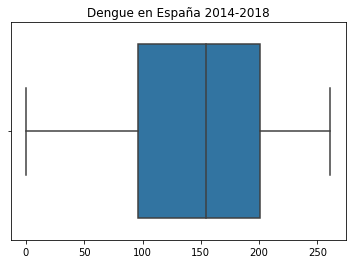

In [28]:
#Análisis estadístico para Dengue en España.
import seaborn as sns


df1e=df1.iloc[3,:].tolist()
df1e=df1e[1:5]
df1e=list(map(int,df1e))
df1e
sns.boxplot(df1e)

plt.title('Dengue en España 2014-2018')
plt.show()



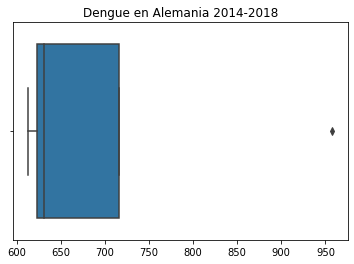

In [8]:
#Análisis estadístico para Dengue en Alemania.
import seaborn as sns


df1a=df1.iloc[1,:].tolist()
df1a=df1a[1:5]
df1a=list(map(int,df1a))
df1a
sns.boxplot(df1a)

plt.title('Dengue en Alemania 2014-2018')
plt.show()

Comparando los diagramas de cajas correspondientes a España y Alemania en los años 2014-2018, observamos que la mitad de los registros para ambos países , se encuentran en los intervalos aproximados de **[100-200] casos para España y [600-700] para Alemania.**

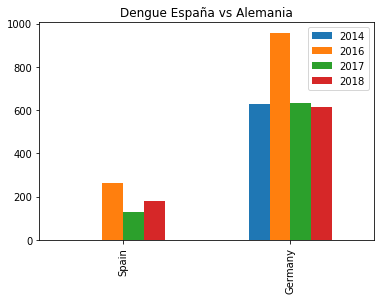

In [9]:
#Transformamos los datos del dataframe ->Valores enteros
paises=['Spain','Germany']

r_16=[df1e,df1a]# Filas tranformadas anteriormente ->de str a int
r_16=pd.DataFrame(r_16)
r_16['Country']=paises
p=r_16['Country']
#Renombramos columnas.
r_16.rename(columns={0:'2014',1:'2016',2:'2017',3:'2018'},inplace=True)
#Procedemos con el gráfico
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html


x=np.arange(2)
r_16.plot(kind='bar',use_index=False,title= 'Dengue España vs Alemania',legend=True)
plt.xticks(x, ('Spain', 'Germany'))
plt.show()
r_16


plt.show()

Confirmando los resultados obtenidos en gráficos anteriores, observamos una mayor incidencia de Dengue en Alemania con un repunte de casos en el año 2016. En España, no se registró ningún caso de Dengue en 2014.

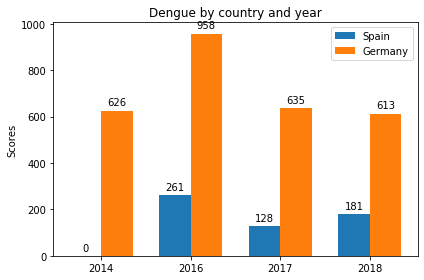

In [10]:
#GRAFICO DENGUE POR AÑOS EN ALEMANIA Y ESPAÑA
#============================================

#Grafico obteniendo vectores por filas
#https://matplotlib.org/3.2.1/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py

a=['2014','2016','2017','2018']
#Valores por filas
spain= r_16.loc[r_16['Country']=='Spain']
s=spain.iloc[0,0:4].tolist()

germany= r_16.loc[r_16['Country']=='Germany']
g=germany.iloc[0,0:4].tolist()
#Grafico
x = np.arange(len(a))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, s, width, label='Spain')
rects2 = ax.bar(x + width/2, g, width, label='Germany')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Dengue by country and year')
ax.set_xticks(x)
ax.set_xticklabels(a)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()


Con este gráfico obtenermos la misma información que con el gráfico anterior, pero esta vez pormenorizando la información por años y cantidades. Se observa un **repunte de casos en 2016, con 958 para Alemania y 261 para España.**

**======================**

**Análisis casos de Zica**

**======================**

In [11]:
#Hagamos la misma comparativa, mismos paises, mismos años , distinta enfermedad

#Importamos el archivo desde la localización en la que se guardó anteriormente

zika=pd.read_csv(open('c:/temp/Zika-annual-epidemiological-report-2018.csv'),delimiter='\t')
zika.head()

,Unnamed: 0,Country,Reported cases_2015,Reported cases_2016,Reported cases_2017,Reported cases_2018
0,0,Austria,1,41,8,0
1,1,Belgium,1,120,42,2
2,2,Bulgaria,.,.,.,.
3,3,Croatia,.,.,0,0
4,4,Cyprus,.,.,.,.


In [12]:
# Caracteristicas básicas del dataframe.
# Número de filas
print('Numero de filas:' ,len(zika))
# Número de columnas.
print('Numero de columnas:' ,len(zika.axes[1]))
#Renombramos columnas
zika.rename(columns={'Reported cases_2015':'Reported_2015','Reported cases_2016':'Reported_2016','Reported cases_2017':'Reported_2017','Reported cases_2018':'Reported_2018'},inplace=True)
# Nombres de las columnas
zika.axes
zika.head()

Numero de filas: 32
Numero de columnas: 6


,Unnamed: 0,Country,Reported_2015,Reported_2016,Reported_2017,Reported_2018
0,0,Austria,1,41,8,0
1,1,Belgium,1,120,42,2
2,2,Bulgaria,.,.,.,.
3,3,Croatia,.,.,0,0
4,4,Cyprus,.,.,.,.


In [13]:
#Nos quedamos con las columnas ,"Reported_2016","Reported_2017","Reported_2018"
#Seguimos el estudio con los mismos paises Italia, Bélgica, Alemania y España.
defz=zika.loc[(zika['Country']=='Italy')|(zika['Country']=='Germany')|(zika['Country']=='Belgium')|(zika['Country']=='Spain'),:]
defz=defz.loc[:,["Country","Reported_2017","Reported_2018"]]
defz


,Country,Reported_2017,Reported_2018
1,Belgium,42,2
10,Germany,69,18
15,Italy,25,2
28,Spain,44,9


[0 1 2 3]
['Belgium', 'Germany', 'Italy', 'Spain']


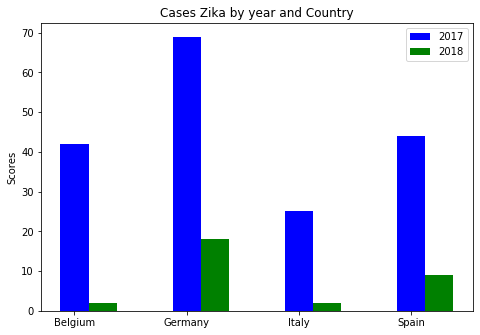

In [14]:
# COMPARATIVA de paises elegidos por años.
#==================================================


import numpy as np
import matplotlib.pyplot as plt



zdiecisiete=defz["Reported_2017"]=defz["Reported_2017"].tolist()#lista con los valores por años
zdieciocho=defz["Reported_2018"]=defz["Reported_2018"].tolist()



zdiecisiete = list(map(int, zdiecisiete))
zdieciocho = list(map(int, zdieciocho))

zdata = [zdiecisiete,zdieciocho]



zlabels=['2017','2018'] #etiquetas con los años
xz = np.arange(4)#Número de paises
print (xz)# Localización de etiquetas
zcountry=defz['Country'].tolist()#lista de paises
print (zcountry)


Xz = np.arange(4)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(Xz + 0.00, zdata[0], color = 'b', width = 0.25,label=zlabels[0])
ax.bar(Xz + 0.25, zdata[1], color = 'g', width = 0.25,label=zlabels[1])



ax.set_ylabel('Scores')
ax.set_title('Cases Zika by year and Country')
ax.set_xticks(xz)
ax.set_xticklabels(zcountry)
ax.legend()
plt.show()





Si representamos los casos de Zika en los años 2017 y 2018 para Alemania, Bélgica, Italia y España observamos una **mayor incidencia en Alemania en ambos años**, obteniendo un **repunte en 2017 generalizado** por países.

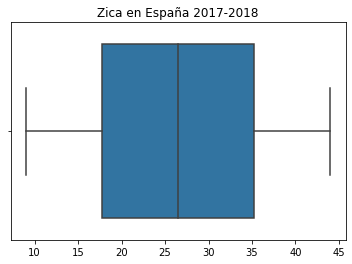

In [15]:
#Análisis estadístico para Zica en España.
import seaborn as sns


defz_spain=defz.iloc[3,:].tolist()
defz_spain=defz_spain[1:5]
defz_spain=list(map(int,defz_spain))
defz_spain
sns.boxplot(defz_spain)

plt.title('Zica en España 2017-2018')
plt.show()


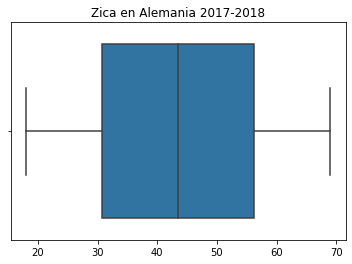

In [16]:
#Análisis estadístico para Zica en Alemania.


defz_g=defz.iloc[1,:].tolist()
defz_g=defz_g[1:5]
defz_g=list(map(int,defz_g))
defz_g
sns.boxplot(defz_g)

plt.title('Zica en Alemania 2017-2018')
plt.show()

Comparando los diagramas de cajas correspondientes a España y Alemania en los años 2017-2018, observamos que la mitad de los registros para ambos países , se encuentran en los intervalos aproximados de **[17-35] casos para España y [30-55] para Alemania.**

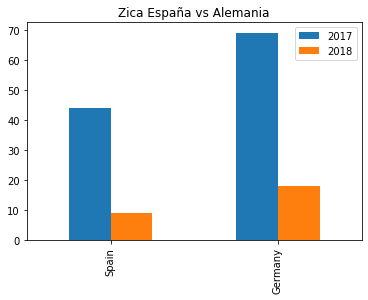

In [17]:
#GRAFICO: Zica España vs Alemania
#============================================
#Transformamos los datos del dataframe ->Valores enteros
paises=['Spain','Germany']

compare=[defz_spain,defz_g]# Filas tranformadas anteriormente ->de str a int
df_c=pd.DataFrame(compare)
df_c['Country']=paises
p=df_c['Country']
#Renombramos columnas.
df_c.rename(columns={0:'2017',1:'2018'},inplace=True)
#Procedemos con el gráfico
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html


x=np.arange(2)
df_c.plot(kind='bar',use_index=False,title= 'Zica España vs Alemania',legend=True)
plt.xticks(x, ('Spain', 'Germany'))
plt.show()
df_c


plt.show()

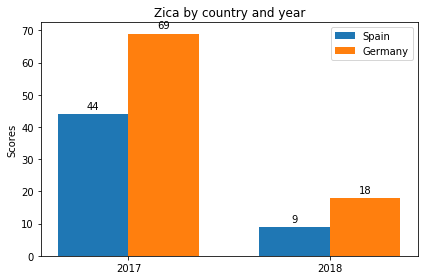

In [18]:
#GRAFICO ZICA POR AÑOS en ALEMANIA y ESPAÑA
#==========================================
#Grafico obteniendo vectores por filas
#https://matplotlib.org/3.2.1/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py

a2=['2017','2018']
#Valores por filas
spain2= df_c.loc[df_c['Country']=='Spain']
s2=spain2.iloc[0,0:2].tolist()


germany2= df_c.loc[df_c['Country']=='Germany']
g2=germany2.iloc[0,0:2].tolist()

#Grafico
x = np.arange(len(a2))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, s2, width, label='Spain')
rects2 = ax.bar(x + width/2, g2, width, label='Germany')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Zica by country and year')
ax.set_xticks(x)
ax.set_xticklabels(a2)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

Confirmando los resultados obtenidos en gráficas anteriores, observamos un **mayor número de casos de Zika en Alemania**, sobre todo en **2017 con 69 personas infectadas**.

**=============================**

**Análisis casos de chikungunya**

**=============================**

In [19]:
#Hagamos la misma comparativa, mismos paises, mismos años , distinta enfermedad

#Importamos el archivo desde la localización en la que se guardó anteriormente

chiku=pd.read_csv(open('c:/temp/chikungunya-annual-epidemiological-report-2018.csv'),delimiter='\t')
chiku.head()

,Unnamed: 0,Country,Reported_2014,Rate_2014,Reported_2015,Rate_2015,Reported_2016,Rate_2016,Reported_2017,Rate_2017,Reported_2018,Rate_2018,ASR_2018,Confirmed
0,0,Austria,.,.,.,.,9,0.1,5,0.1,1,0.0,0.0,0
1,1,Belgium,74,0.7,44,0.4,29,0.3,10,0.1,3,0.0,0.0,3
2,2,Bulgaria,.,.,.,.,.,.,.,.,.,.,.,.
3,3,Croatia,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0.0,0
4,4,Cyprus,.,.,.,.,.,.,.,.,.,.,.,.


In [20]:
# Caracteristicas básicas del dataframe.
# Número de filas
print('Numero de filas:' ,len(chiku))
# Número de columnas.
print('Numero de columnas:' ,len(chiku.axes[1]))
print(chiku.axes)
chiku.head()
#Nos quedamos con las columnas ,"Reported_2016","Reported_2017","Reported_2018"
#Seguimos el estudio con los mismos paises Italia, Bélgica, Alemania y España.
ck=chiku.loc[(chiku['Country']=='Italy')|(chiku['Country']=='Germany')|(chiku['Country']=='Belgium')|(chiku['Country']=='Spain'),:]
ck=ck.loc[:,["Country","Reported_2017","Reported_2018"]]
ck

Numero de filas: 36
Numero de columnas: 14
[RangeIndex(start=0, stop=36, step=1), Index(['Unnamed: 0', 'Country', 'Reported_2014', 'Rate_2014', 'Reported_2015',
       'Rate_2015', 'Reported_2016', 'Rate_2016', 'Reported_2017', 'Rate_2017',
       'Reported_2018', 'Rate_2018', 'ASR_2018', 'Confirmed'],
      dtype='object')]


,Country,Reported_2017,Reported_2018
1,Belgium,10,3
12,Germany,33,26
17,Italy,289,4
30,Spain,51,27


[0 1 2 3]
['Belgium', 'Germany', 'Italy', 'Spain']


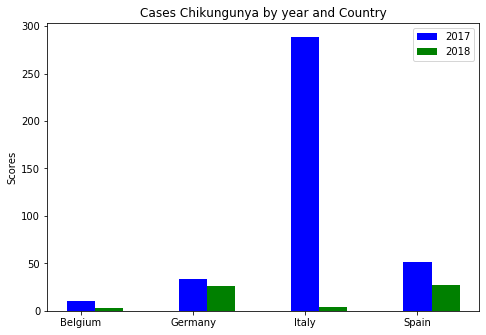

In [21]:
# COMPARATIVA de paises elegidos por años.
#==================================================


import numpy as np
import matplotlib.pyplot as plt



kdiecisiete=ck["Reported_2017"]=ck["Reported_2017"].tolist()#lista con los valores por años
kdieciocho=ck["Reported_2018"]=ck["Reported_2018"].tolist()



kdiecisiete = list(map(int, kdiecisiete))
kdieciocho = list(map(int, kdieciocho))

kdata = [kdiecisiete,kdieciocho]



klabels=['2017','2018'] #etiquetas con los años
xk = np.arange(4)#Número de paises
print (xk)# Localización de etiquetas
kcountry=ck['Country'].tolist()#lista de paises
print (kcountry)


Xk = np.arange(4)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(Xk + 0.00, kdata[0], color = 'b', width = 0.25,label=klabels[0])
ax.bar(Xk + 0.25, kdata[1], color = 'g', width = 0.25,label=klabels[1])



ax.set_ylabel('Scores')
ax.set_title('Cases Chikungunya by year and Country')
ax.set_xticks(xk)
ax.set_xticklabels(kcountry)
ax.legend()
plt.show()


En este gráfico y rompiendo la tendencia observada hasta el momento, se evidencia un **mayor número de casos de Chikungunya en Italia en 2017** (con una diferencia notable).Tendríamos que estudiar el caso, por posible influencia de outliers o quizá por motivos derivados de un turismo elevado a ciertas zonas, plagas etc..
Sin embargo en el año **2018**, disminuyen los casos de forma generalizada siendo **Alemania y España** los países con mayor número.

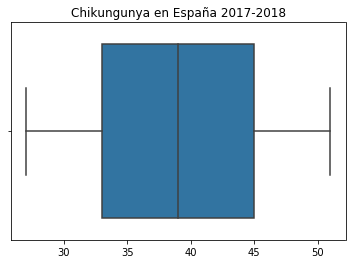

In [22]:
#Análisis estadístico para Chikungunya en España.
import seaborn as sns


ck_spain=ck.iloc[3,:].tolist()
ck_spain=ck_spain[1:5]
ck_spain=list(map(int,ck_spain))
ck_spain
sns.boxplot(ck_spain)

plt.title('Chikungunya en España 2017-2018')
plt.show()

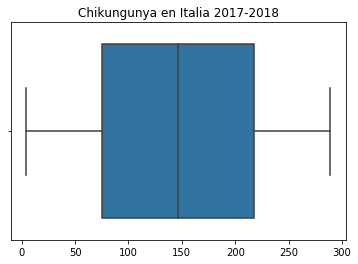

In [27]:
#Análisis estadístico para Chikungunya en Italia.


ck_g=ck.iloc[2,:].tolist()
ck_g=ck_g[1:5]
ck_g=list(map(int,ck_g))
ck_g
sns.boxplot(ck_g)

plt.title('Chikungunya en Italia 2017-2018')
plt.show()

Comparando los diagramas de cajas correspondientes a España e Italia en los años 2017-2018, observamos que la mitad de los registros para ambos países , se encuentran en los intervalos aproximados de **[33-45] casos para España y [60-220] para Italia.**

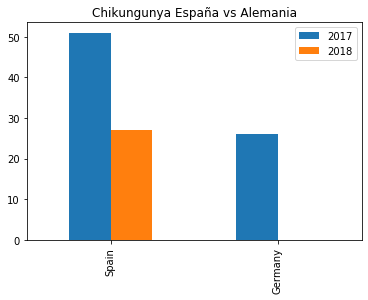

In [24]:
#GRAFICO: Chikungunya España vs Alemania
#============================================
#Transformamos los datos del dataframe ->Valores enteros
paises=['Spain','Germany']

compare=[ck_spain,ck_g]# Filas tranformadas anteriormente ->de str a int
df_ck=pd.DataFrame(compare)
df_ck['Country']=paises
pk=df_ck['Country']
#Renombramos columnas.
df_ck.rename(columns={0:'2017',1:'2018'},inplace=True)
#Procedemos con el gráfico
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html


x=np.arange(2)
df_ck.plot(kind='bar',use_index=False,title= 'Chikungunya España vs Alemania',legend=True)
plt.xticks(x, ('Spain', 'Germany'))
plt.show()
df_ck


plt.show()

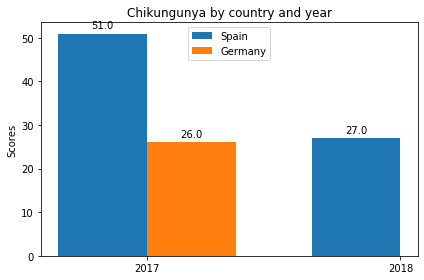

In [25]:
#GRAFICO Chikungunya POR AÑOS en ALEMANIA y ESPAÑA
#==========================================
#Grafico obteniendo vectores por filas
#https://matplotlib.org/3.2.1/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py

a3=['2017','2018']
#Valores por filas
spain3= df_ck.loc[df_ck['Country']=='Spain']
sk=spain3.iloc[0,0:2].tolist()


germany3= df_ck.loc[df_ck['Country']=='Germany']
gk=germany3.iloc[0,0:2].tolist()

#Grafico
x = np.arange(len(a2))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, sk, width, label='Spain')
rects2 = ax.bar(x + width/2, gk, width, label='Germany')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Chikungunya by country and year')
ax.set_xticks(x)
ax.set_xticklabels(a3)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()



Si establecemos una comparativa entre España y Alemania, observamos que en Alemania no se encuentran registros de Chikungunya en 2018, contando **España con un mayor número de casos en 2017 (51)**